In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("add.csv")

In [ ]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

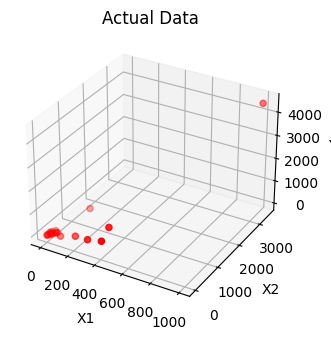

array([20.])

In [ ]:
def plot_and_predict(x1,x2):

    y_pred=lr.predict(pd.DataFrame({"x":[x1],"y":[x2]}))
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(df['x'], df['y'], df['sum'], c='r', marker='o', label='Actual data')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title('Actual Data')
    plt.show()
    return y_pred

plot_and_predict(10,10)

In [ ]:

import gradio as gr

def predict_sum(x1, x2):
  y_pred = lr.predict(pd.DataFrame({"x":[x1],"y":[x2]}))
  return y_pred[0]

iface = gr.Interface(
    fn=predict_sum,
    inputs=["number", "number"],
    outputs="number",
    title="Sum Prediction",
    description="Enter two numbers (x1 and x2) to predict their sum.",
)

iface.launch(debug=True,share=True)

IMPORTANT: You are using gradio version 3.35.2, however version 4.29.0 is available, please upgrade.
--------
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://eef419fd294ab8eec7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7862 <> https://eef419fd294ab8eec7.gradio.live


In [ ]:
import numpy as np

class MyLinearRegression:
    def __init__(self):
        self.coef_ = None  # To store the coefficients (beta values)
        self.intercept_ = None  # To store the intercept

    def fit(self, X, y):
        # Add a column of ones to X to represent the intercept
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term (intercept) as the first column

        # Normal Equation: beta = (X^T * X)^(-1) * X^T * y
        beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

        # Extract intercept and coefficients
        self.intercept_ = beta[0]  # First term is the intercept
        self.coef_ = beta[1:]      # Rest are the coefficients

    def predict(self, X):
        # Add a column of ones to X to account for the intercept
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Prediction: y_pred = X * beta
        return X_b.dot(np.r_[self.intercept_, self.coef_])

    def score(self, X, y):
        # Calculate R^2 score
        y_pred = self.predict(X)
        total_variance = ((y - y.mean()) ** 2).sum()
        residual_variance = ((y - y_pred) ** 2).sum()
        r2_score = 1 - (residual_variance / total_variance)
        return r2_score

# Testing the MyLinearRegression class
if __name__ == "__main__":
    # Example dataset
    X = np.array([[1, 2], [2, 3], [4, 5], [3, 6], [7, 8]])  # Features
    y = np.array([5, 7, 10, 12, 17])  # Target

    # Initialize the model
    model = MyLinearRegression()

    # Fit the model to the data
    model.fit(X, y)

    # Coefficients
    print("Intercept:", model.intercept_)
    print("Coefficients:", model.coef_)

    # Predict on new data
    X_new = np.array([[3, 4], [5, 6]])
    predictions = model.predict(X_new)
    print("Predictions:", predictions)

    # Calculate R^2 score
    r2 = model.score(X, y)
    print("R^2 score:", r2)


Intercept: 1.2142857142857455
Coefficients: [0.35714286 1.61904762]
Predictions: [ 8.76190476 12.71428571]
R^2 score: 0.9914965986394558
